# Stanford CS25: Self-Attention and Non-Parametric Transformers (NPTs)

Welcome to these comprehensive notes based on the Stanford CS25 video ([YouTube](https://www.youtube.com/watch?v=zejXBg-2Vpk)) and the research paper on Non-Parametric Transformers ([Kuleshov et al., 2021, arXiv:2106.02584](https://arxiv.org/abs/2106.02584)). If you're new to machine learning or Transformers, you're in the right place! These notes are designed for beginners but aim to provide a deep understanding of self-attention and the innovative Non-Parametric Transformer (NPT) architecture.

We'll break down complex concepts into simple explanations, use analogies, provide illustrative visualizations, and walk through interactive Python code examples. Our focus is on building strong intuition so you can grasp not just *what* these models do, but *how* and *why* they work.

## Why Should You Care About NPTs?
Imagine you're trying to predict the price of a house. Traditional models might learn a fixed relationship between features (like size, number of rooms) and price. Non-Parametric Transformers go a step further. When predicting the price for a new house, an NPT looks at *all other houses in your dataset*, figures out which ones are most similar or relevant (even in complex ways!), and then uses that information to make a prediction. This ability to directly consult and reason about the entire dataset during prediction makes NPTs particularly powerful for tasks involving tabular data, where understanding relationships between samples is key.

## What Will You Learn?
- **Self-Attention**: The fundamental mechanism that allows models to weigh the importance of different parts of input data.
- **Transformers**: A brief overview of the architecture that revolutionized sequence processing.
- **Non-Parametric Transformers (NPTs)**: A deep dive into this novel architecture that applies Transformer-like attention to the entire dataset (samples and features).
- **How NPTs Work**: We'll explore their architecture, including Attention Between Datapoints (ABD) and Attention Between Attributes (ABA), feature tokenization, and the self-supervised training process.
- **Real-World Applications**: How NPTs perform on tabular data benchmarks and image classification tasks.
- **Theoretical Underpinnings**: Properties like permutation equivariance and connections to other non-parametric methods.
- **Interactive Exploration**: Engage with code and visualizations to see concepts like attention and model parameters in action.

## Prerequisites
A basic understanding of Python (loops, functions, classes) and familiarity with core machine learning concepts (like training, testing, features) will be helpful. We'll be using the following Python libraries:
- **NumPy**: For numerical operations.
- **Matplotlib & Seaborn**: For plotting and visualizations.
- **PyTorch**: For building and experimenting with neural network models.
- **ipywidgets**: For interactive elements in the notebook.

You can install them using pip:
```bash
pip install numpy matplotlib seaborn torch ipywidgets
```
If you're using Jupyter Notebook or JupyterLab, you might need to enable the ipywidgets extension:
```bash
jupyter nbextension enable --py widgetsnbextension
```
Or for JupyterLab:
```bash
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
Ready to embark on this learning journey? Let's begin!

## Table of Contents
1. [Introduction to Transformers and Self-Attention](#section1)
   - [What Are Transformers?](#section1_1)
   - [What Is Self-Attention? The Core Idea](#section1_2)
   - [How Self-Attention Works: Queries, Keys, and Values](#section1_3)
   - [The Self-Attention Formula: A Closer Look](#section1_4)
   - [Visualizing Self-Attention](#section1_5)
   - [Multi-Head Attention: Seeing from Different Perspectives](#section1_6)
   - [Positional Encoding: Understanding Order](#section1_7)
   - [The Transformer Block: Putting It Together](#section1_8)
2. [Non-Parametric Transformers (NPTs)](#section2)
   - [Motivation: Beyond Fixed Parameters](#section2_1)
   - [Core Idea of NPTs: Dataset as Input](#section2_2)
   - [NPT Architecture: A Detailed Look](#section2_3)
     - [Feature Tokenization: Preparing the Input](#section2_3_1)
     - [NPT Layers: ABD and ABA](#section2_3_2)
     - [Attention Between Datapoints (ABD)](#section2_3_3)
     - [Attention Between Attributes (ABA)](#section2_3_4)
     - [Multi-Head Attention in NPTs](#section2_3_5)
     - [Feed-Forward Networks, Residual Connections, and Layer Normalization](#section2_3_6)
   - [Self-Supervised Training with Stochastic Masking](#section2_4)
   - [Inference with NPTs](#section2_5)
   - [Visualizing NPT Attention (ABD and ABA)](#section2_6)
3. [Experimental Results and Applications of NPTs](#section3)
   - [Performance on Tabular Data (UCI Benchmarks)](#section3_1)
   - [Image Classification Results (MNIST, CIFAR-10)](#section3_2)
   - [Semi-Synthetic Experiments: Probing NPT Capabilities](#section3_3)
4. [Theoretical Aspects and Ablation Studies](#section4)
   - [Permutation Equivariance and Invariance Properties](#section4_1)
   - [Connections to Other Non-Parametric Methods](#section4_2)
   - [Ablation Studies: Understanding Component Importance](#section4_3)
5. [Computational Costs and Societal Impacts](#section5)
   - [Computational Requirements](#section5_1)
   - [Societal Considerations: Explainability, Fairness, Privacy, Environment](#section5_2)
6. [Interactive Examples and Further Exploration](#section6)
   - [Interactive Self-Attention Dropout](#section6_1)
   - [Interactive NPT Attention (Datapoint Scaling)](#section6_2)
   - [Interactive NPT Parameter Exploration (Simplified Model)](#section6_3)
7. [Conclusion and Further Resources](#section7)


<a id='section1'></a>
## 1. Introduction to Transformers and Self-Attention

<a id='section1_1'></a>
### What Are Transformers?
Transformers, introduced in the groundbreaking paper 'Attention is All You Need' by Vaswani et al. (2017) ([arXiv:1706.03762](https://arxiv.org/abs/1706.03762)), are a type of deep learning model that has achieved state-of-the-art results in many domains, especially in Natural Language Processing (NLP). They've been successfully applied to tasks like machine translation, text summarization, question answering, and even in computer vision and reinforcement learning.

Unlike recurrent neural networks (RNNs) that process data sequentially (one token at a time), Transformers can process entire sequences in parallel. This parallelization, combined with their core mechanism called **self-attention**, allows them to learn long-range dependencies in data more effectively and efficiently.

**Analogy**: Imagine reading a book. An RNN reads it word by word, trying to remember everything from the beginning. A Transformer, on the other hand, can look at all the words in a chapter (or even the whole book) simultaneously, figuring out how different words and sentences relate to each other, no matter how far apart they are.

<a id='section1_2'></a>
### What Is Self-Attention? The Core Idea
Self-attention is the heart of a Transformer. It's a mechanism that allows the model, when processing a particular element in a sequence (like a word in a sentence), to look at other elements in the same sequence for context and assign different levels of 'attention' or importance to them.

In essence, self-attention helps the model build a richer representation of each element by incorporating information from other relevant elements in its context.

**Analogy**: When you read the sentence, 'The **animal** didn't cross the street because **it** was too tired,' your brain effortlessly understands that '**it**' refers to 'the **animal**.' Self-attention allows a model to make similar connections. When processing the word 'it', the model would pay higher attention to 'animal' to understand its meaning in this context.

<a id='section1_3'></a>
### How Self-Attention Works: Queries, Keys, and Values
To implement self-attention, we associate three vectors with each input element (e.g., each word embedding in a sentence):
- **Query (Q)**: This vector represents the current element's 'question' or what it's looking for. Think of it as the current word saying, "I'm this word, what other words in this sentence are relevant to me?"
- **Key (K)**: This vector acts like a 'label' or 'identifier' for each element in the sequence. It's what other elements offer or what they are known for. It responds to the Query by saying, "I'm this other word, and here's what I'm about."
- **Value (V)**: This vector contains the actual 'substance' or information of an element. Once the Query finds relevant Keys, the corresponding Values are used to construct the output for the current element.

**The Process (Simplified):**
1.  **Projection**: For each input element (embedding), we create its Q, K, and V vectors by multiplying the embedding with three separate learned weight matrices (W_Q, W_K, W_V).
2.  **Scoring**: To determine how much attention the current element (represented by its Q vector) should pay to another element (represented by its K vector), we calculate a score. This is typically done using a dot product between the Q vector of the current element and the K vector of the other element: `score = Q · K`.
3.  **Scaling**: The scores are scaled down by dividing by the square root of the dimension of the Key vectors (√d_k). This helps stabilize gradients during training.
4.  **Softmax**: The scaled scores are passed through a softmax function. This normalizes the scores so they all sum up to 1, effectively converting them into attention weights (probabilities). A higher weight means more attention.
5.  **Weighted Sum**: The output for the current element is a weighted sum of all Value (V) vectors in the sequence, where the weights are the softmax-normalized attention scores. So, elements that are deemed more relevant (higher attention weight) contribute more of their Value to the output.

This process is performed for every element in the sequence, allowing each element to attend to all other elements (including itself) and derive a contextually enriched representation.

<a id='section1_4'></a>
### The Self-Attention Formula: A Closer Look
The self-attention mechanism can be concisely expressed with the following formula:
\[
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V
\]
Let's break this down:
- \(Q\): Matrix of Query vectors (rows are individual query vectors).
- \(K\): Matrix of Key vectors (rows are individual key vectors).
- \(V\): Matrix of Value vectors (rows are individual value vectors).
- \(K^T\): Transpose of the Key matrix.
- \(QK^T\): This computes the dot product scores between all Query vectors and all Key vectors. If Q is `(num_queries, d_k)` and K^T is `(d_k, num_keys)`, the result is an `(num_queries, num_keys)` matrix of scores. In self-attention, `num_queries` is the sequence length, and `num_keys` is also the sequence length.
- \(\sqrt{d_k}\): Scaling factor, where \(d_k\) is the dimension of the Key (and Query) vectors.
- \(\text{softmax}(\cdot)\): Applied row-wise to the scaled scores, converting them into attention weights that sum to 1 for each query.
- \(V\): The final multiplication with the Value matrix aggregates the information from different elements based on the computed attention weights.

**Example Walkthrough (Conceptual):**
Sentence: "Robots love NPTs"
Let's focus on the word "Robots":
1.  **Q_Robots, K_Robots, V_Robots; Q_love, K_love, V_love; Q_NPTs, K_NPTs, V_NPTs** are created.
2.  To update "Robots", its Q_Robots interacts with all K vectors:
    - Score_Robots_Robots = Q_Robots · K_Robots
    - Score_Robots_love = Q_Robots · K_love
    - Score_Robots_NPTs = Q_Robots · K_NPTs
3.  These scores are scaled and softmaxed to get weights: w_Robots_Robots, w_Robots_love, w_Robots_NPTs.
4.  The new representation for "Robots" becomes: (w_Robots_Robots * V_Robots) + (w_Robots_love * V_love) + (w_Robots_NPTs * V_NPTs).

<a id='section1_5'></a>
### Visualizing Self-Attention
Let's visualize the attention weights. The heatmap will show how much each word in a sample sentence attends to other words.

In [1]:
!pip install numpy matplotlib seaborn torch ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

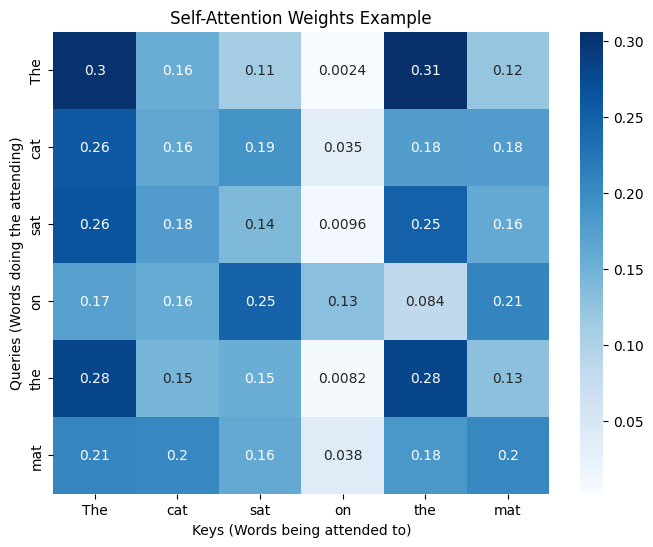

Shape of input embeddings: torch.Size([6, 8])
Shape of Q, K, V: torch.Size([6, 8]) torch.Size([6, 8]) torch.Size([6, 8])
Shape of scores: torch.Size([6, 6])
Shape of attention_weights: torch.Size([6, 6])
Shape of output: torch.Size([6, 8])


In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Let's simulate word embeddings for a sentence: 'The cat sat on the mat'
words = ['The', 'cat', 'sat', 'on', 'the', 'mat']
seq_len = len(words)
embed_dim = 8 # Dimensionality of embeddings (and Q, K, V before multiple heads)
d_k = embed_dim # For simplicity, let d_k = embed_dim

torch.manual_seed(42)
embeddings = torch.rand(seq_len, embed_dim) # (seq_len, embed_dim)

# Simulate weight matrices for Q, K, V (these would be learned during training)
W_q = torch.randn(embed_dim, d_k)
W_k = torch.randn(embed_dim, d_k)
W_v = torch.randn(embed_dim, d_k) # d_v is often same as d_k, but can differ. Here d_v = d_k

# Compute Q, K, V vectors
Q = embeddings @ W_q # (seq_len, d_k)
K = embeddings @ W_k # (seq_len, d_k)
V = embeddings @ W_v # (seq_len, d_v)

# Step 1: Calculate scores (QK^T)
scores = Q @ K.transpose(-2, -1) # (seq_len, seq_len)

# Step 2: Scale scores
scaled_scores = scores / (d_k**0.5)

# Step 3: Apply softmax to get attention weights
attention_weights = F.softmax(scaled_scores, dim=-1) # (seq_len, seq_len)

# Step 4: Compute output as weighted sum of V
output = attention_weights @ V # (seq_len, d_v)

# Visualize attention weights
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights.detach().numpy(), annot=True, cmap='Blues',
            xticklabels=words, yticklabels=words)
plt.title('Self-Attention Weights Example')
plt.xlabel('Keys (Words being attended to)')
plt.ylabel('Queries (Words doing the attending)')
plt.savefig('self_attention_heatmap_example.png') # Save the figure
plt.show()

print("Shape of input embeddings:", embeddings.shape)
print("Shape of Q, K, V:", Q.shape, K.shape, V.shape)
print("Shape of scores:", scores.shape)
print("Shape of attention_weights:", attention_weights.shape)
print("Shape of output:", output.shape)

**Explanation of the Heatmap**:
Each row in the heatmap corresponds to a 'Query' word (the word doing the attending), and each column corresponds to a 'Key' word (the word being attended to). The values in the cells (from 0 to 1) represent the attention weights. A darker blue (higher value) means that the Query word pays more attention to that Key word when computing its new representation. For example, to compute the output for 'cat' (second row), look at the weights in that row to see how much it 'attends' to 'The', 'cat', 'sat', 'on', 'the', and 'mat'.

<a id='section1_6'></a>
### Multi-Head Attention: Seeing from Different Perspectives
Instead of performing a single attention function, Transformers use **Multi-Head Attention**. This involves running the self-attention mechanism multiple times (each 'head') in parallel, with different, independently learned linear projections for Q, K, and V.

**Why Multi-Head?**
1.  **Different Representation Subspaces**: Each head can learn to focus on different types of relationships or aspects of the input. For example, one head might focus on syntactic relationships, while another focuses on semantic similarity.
2.  **Increased Model Capacity**: It allows the model to jointly attend to information from different representation subspaces at different positions.

**How it Works:**
1.  The input embedding is split or projected into multiple smaller-dimensional Q, K, V sets for each head.
2.  Self-attention is computed independently for each head, producing an output vector for each.
3.  The output vectors from all heads are concatenated and then linearly projected once more to produce the final output of the multi-head attention layer.

**Analogy**: Imagine a group of experts (the 'heads') analyzing a complex problem. Each expert might focus on different facets of the problem based on their specialty. By combining their insights, a more comprehensive understanding is achieved. Multi-head attention works similarly by allowing the model to capture diverse contextual relationships simultaneously.

Shape of Multi-Head Attention output: torch.Size([1, 6, 8])
Shape of Multi-Head Attention weights: torch.Size([1, 6, 6])


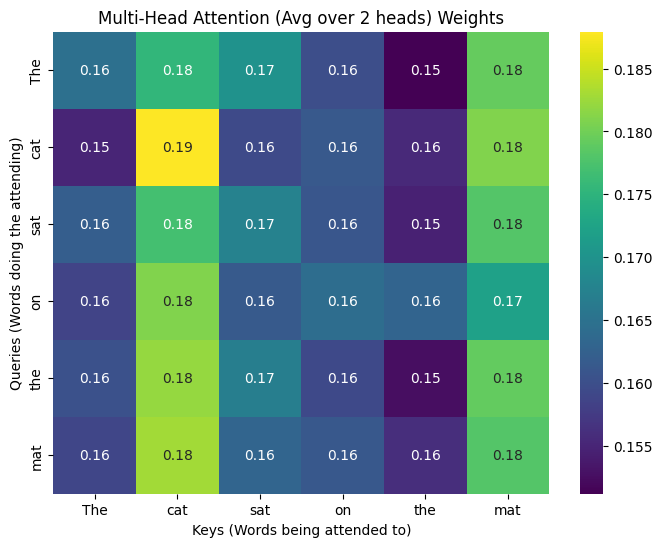

In [3]:
import torch.nn as nn

# Example of using PyTorch's MultiheadAttention module
num_heads = 2 # Let's use 2 attention heads
# embed_dim must be divisible by num_heads
assert embed_dim % num_heads == 0

multi_head_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, bias=True, batch_first=True)
# batch_first=True means input and output tensors are provided as (batch, seq, feature)

# Input needs to be (batch_size, seq_len, embed_dim)
batch_embeddings = embeddings.unsqueeze(0) # Add a batch dimension (1, seq_len, embed_dim)

# In self-attention, query, key, and value are the same
attn_output, attn_output_weights = multi_head_attn(batch_embeddings, batch_embeddings, batch_embeddings)

print("Shape of Multi-Head Attention output:", attn_output.shape) # (batch_size, seq_len, embed_dim)
print("Shape of Multi-Head Attention weights:", attn_output_weights.shape) # (batch_size, seq_len, seq_len)

# attn_output_weights are the average attention weights over all heads.
# To get per-head weights, you'd typically need to implement it manually or delve into the module's internals if it provides them.
# PyTorch's nn.MultiheadAttention combines the heads and doesn't return per-head weights by default in its forward if `need_weights=True` (it returns average over heads for `attn_output_weights`).

# Let's visualize the average attention weights from nn.MultiheadAttention
plt.figure(figsize=(8, 6))
sns.heatmap(attn_output_weights.squeeze(0).detach().numpy(), annot=True, cmap='viridis',
            xticklabels=words, yticklabels=words)
plt.title(f'Multi-Head Attention (Avg over {num_heads} heads) Weights')
plt.xlabel('Keys (Words being attended to)')
plt.ylabel('Queries (Words doing the attending)')
plt.savefig('multi_head_attention_heatmap.png')
plt.show()

<a id='section1_7'></a>
### Positional Encoding: Understanding Order
Self-attention, by its nature, is permutation-invariant with respect to its inputs if no order information is provided; it treats the input as a 'bag' of elements. This means it doesn't inherently know the order or position of elements in a sequence. However, for many tasks (like language understanding), the order is crucial ('man bites dog' vs. 'dog bites man').

To address this, Transformers inject **positional encodings** into the input embeddings at the bottom of the encoder and decoder stacks. These encodings are vectors that provide information about the position of each element in the sequence. They can be learned or fixed (e.g., sinusoidal functions as in the original Transformer paper).

This way, the model can differentiate between the same word appearing at different positions in a sentence.

<a id='section1_8'></a>
### The Transformer Block: Putting It Together
A standard Transformer (encoder or decoder) layer, often called a Transformer block, typically consists of:
1.  **Multi-Head Self-Attention Layer**: As described above.
2.  **Add & Norm (Residual Connection and Layer Normalization)**: The output of the attention layer is added to its input (residual connection), followed by layer normalization. Residual connections help prevent vanishing gradients in deep networks, and layer normalization stabilizes the activations.
3.  **Feed-Forward Network (FFN)**: A position-wise fully connected feed-forward network, which consists of two linear transformations with a ReLU or GeLU activation in between. This is applied independently to each position.
4.  **Add & Norm**: Another residual connection and layer normalization after the FFN.

Multiple such blocks are stacked to form the full Transformer encoder or decoder.
```
Input Embedding + Positional Encoding
↓
---------------------------------------
| Transformer Block 1:                |
|   Multi-Head Attention              |
|   Add & Norm                        |
|   Feed-Forward Network              |
|   Add & Norm                        |
---------------------------------------
↓
---------------------------------------
| Transformer Block 2:                |
|   ... (same structure) ...          |
---------------------------------------
↓
... (more blocks) ...
↓
Output
```
This understanding of self-attention and Transformer blocks is crucial, as Non-Parametric Transformers adapt these concepts in a novel way.

<a id='section2'></a>
## 2. Non-Parametric Transformers (NPTs)

Now we delve into Non-Parametric Transformers (NPTs), as introduced by Kuleshov et al. (2021). NPTs leverage the power of self-attention but apply it in a different context: directly to tabular datasets, considering relationships *between datapoints* and *between features* within those datapoints.

<a id='section2_1'></a>
### Motivation: Beyond Fixed Parameters

Most traditional machine learning models, including standard neural networks, are **parametric**. This means that during training, they learn a fixed set of parameters (weights and biases). Once trained, the model uses only these learned parameters to make predictions on new data; the training data itself is discarded (except for perhaps some summary statistics like mean/std for normalization).

**Example (Parametric)**: A linear regression model learns coefficients (parameters) for each feature. For a new house, it plugs the house's features into the learned equation `price = w1*size + w2*bedrooms + b`.

**Non-parametric models**, in contrast, do not have a fixed set of parameters that define their functional form. Instead, the complexity of the model can grow with the size of the training data. Crucially, many non-parametric models (like k-Nearest Neighbors or Kernel Regression) directly use some or all of the training data points during the prediction phase.

**Example (Non-Parametric - kNN)**: To predict the price of a new house, k-NN finds the 'k' most similar houses from the *entire training set* and averages their prices.

**Why NPTs?**
For tabular data, it's often beneficial to explicitly compare a new test datapoint to existing training datapoints. NPTs aim to combine the representational power of Transformers with this non-parametric idea of leveraging the entire dataset at inference time. They are designed to explicitly model interactions between datapoints and between features, making them well-suited for tasks where such relationships are important, which is common in tabular datasets.

The NPT paper puts it this way: *"NPTs can make predictions by explicitly comparing a test example against training examples, and can provide explanations for their predictions in terms of training data points that were influential."* This is a key advantage.

<a id='section2_2'></a>
### Core Idea of NPTs: Dataset as Input

The central innovation of NPTs is that they process the **entire dataset (both training and test samples, or a large batch of training samples) as a single input sequence** to a Transformer-like architecture.

Imagine your dataset \(X\) has \(N\) datapoints (rows) and \(D\) features (columns). NPTs essentially treat this entire \(N \times D\) table as the input.

This allows the self-attention mechanism to:
1.  **Model relationships between different datapoints**: For a given datapoint, which other datapoints in the dataset are most relevant for predicting its (masked) features or target?
2.  **Model relationships between different features**: Within a datapoint, or across datapoints, how do different features relate to each other?

**Analogy**: Think of a detective solving a complex case (predicting a missing value).
- A **parametric model** is like a detective who has studied many past cases and developed a set of general rules. They apply these rules to the current case without looking back at the old case files.
- An **NPT** is like a detective who not only has general rules but also spreads out all the files of *similar past cases* on a giant table, constantly comparing them to the current case and to each other to find subtle patterns and make a decision. The NPT uses the entire 'evidence room' (dataset) for each prediction.

<a id='section2_3'></a>
### NPT Architecture: A Detailed Look
The NPT architecture consists of several key components:

```
Input Data Table (N samples, D features)
↓
Feature Tokenizer (Embeds each (sample, feature) cell)
  - Numerical features: Linear projection
  - Categorical features: Embedding lookup
Result: Tensor H_0 of shape (N, D, d_model)
↓
-----------------------------------------------------
| NPT Layer 1:                                      |
|   Attention Between Datapoints (ABD)              |
|     (Acts across N, treats D*d_model as channels) |
|   Add & Norm                                      |
|   Attention Between Attributes (ABA)              |
|     (Acts across D, treats N*d_model as channels) |
|   Add & Norm                                      |
|   Optional: Row-wise/Column-wise FFNs             |
-----------------------------------------------------
↓
... (Stack L such NPT layers, typically L=8) ...
↓
Output Representation H_L (N, D, d_model)
↓
Prediction Heads (e.g., Linear layer for masked values)
```
Let's break these down.

<a id='section2_3_1'></a>
#### Feature Tokenization: Preparing the Input
Before feeding the tabular data into the Transformer layers, each feature value needs to be converted into an embedding vector of dimension \(d_{	ext{model}}\). This is analogous to word embeddings in NLP.

- **Input**: A dataset \(X\) of shape \((N, D)\), where \(N\) is the number of datapoints and \(D\) is the number of features.
- **Process**:
  - For each feature \(j\) (column \(j\)) in the dataset:
    - If feature \(j\) is **numerical**: Its scalar values \(x_{ij}\) are projected into \(d_{	ext{model}}\)-dimensional embeddings using a distinct linear layer (\(E_j(x_{ij}) = W_j x_{ij} + b_j\)).
    - If feature \(j\) is **categorical**: Its values are first mapped to integer indices, and then these indices are used to look up \(d_{	ext{model}}\)-dimensional embeddings from a distinct embedding table (\(E_j(x_{ij}) = \text{Embedding}_j[\text{idx}(x_{ij})]\)).
- **Output**: An initial representation tensor \(H^{(0)} \in \mathbb{R}^{N \times D \times d_{	ext{model}}}\), where \(H^{(0)}_{idm}\) is the \(m\)-th dimension of the embedding for feature \(d\) of datapoint \(i\).

Additionally, special `[MASK]` tokens are also embedded if used during training (for stochastic masking, discussed later).

<a id='section2_3_2'></a>
#### NPT Layers: ABD and ABA
The core of NPT consists of a stack of \(L\) identical layers (typically \(L=8\) in the paper). Each layer performs two main types of attention sequentially:
1.  **Attention Between Datapoints (ABD)**: Operates across the datapoints (rows).
2.  **Attention Between Attributes (ABA)**: Operates across the attributes/features (columns).

The paper suggests that this alternating attention is crucial. ABD allows the model to learn cross-sample information (like k-NN), while ABA allows it to learn cross-feature information (like how features within a sample correlate).

<a id='section2_3_3'></a>
#### Attention Between Datapoints (ABD)
- **Purpose**: To model relationships between different datapoints. For each datapoint \(i\), ABD updates its representation by attending to all other datapoints \(i'\) in the (mini-)batch.
- **How it works**:
  - The input tensor \(H \in \mathbb{R}^{N \times D \times d_{	ext{model}}}\) is reshaped or viewed as \(H_{	ext{ABD}} \in \mathbb{R}^{N 	imes (D \cdot d_{	ext{model}})}\). Conceptually, each datapoint \(i\) is now a single vector of dimension \(D \cdot d_{	ext{model}}\).
  - Standard self-attention (multi-head) is applied across the \(N\) datapoints. Each datapoint \(i\) generates a Query, Key, and Value from its \((D \cdot d_{	ext{model}})\)-dimensional representation.
  - The output is a new representation for each datapoint, enriched with information from other relevant datapoints.
- **Analogy**: For each student in a class, ABD looks at all other students' complete profiles (all their features combined) to update the current student's understanding or make predictions about them.
- **Complexity**: Quadratic in \(N\) (number of datapoints in the batch), \(O(N^2 D d_{	ext{model}})\).

<a id='section2_3_4'></a>
#### Attention Between Attributes (ABA)
- **Purpose**: To model relationships between different features/attributes within or across datapoints.
- **How it works**:
  - The input tensor \(H \in \mathbb{R}^{N 	imes D 	imes d_{	ext{model}}}\) is reshaped or viewed by transposing it to effectively treat features as the sequence: \(H_{	ext{ABA}} \in \mathbb{R}^{D 	imes (N \cdot d_{	ext{model}})}\). Conceptually, each feature \(j\) is now represented by a vector that concatenates its values across all \(N\) samples (or more accurately, its \(d_{	ext{model}}\) embeddings across all \(N\) samples).
  - More precisely, the paper states that for ABA, the attention is applied over the \(D\) attributes. This can be thought of as, for each attribute \(j\), creating Q, K, V vectors based on its representation \(H_{:j:}\) (shape \(N 	imes d_{	ext{model}}\) flattened or processed) and attending over all other attributes \(j'\).
  - The paper's implementation likely applies attention such that each attribute embedding \(H_{ij:} \in \mathbb{R}^{d_{	ext{model}}}\) for a sample \(i\) is updated by attending to all other attribute embeddings \(H_{ij':}\) of the *same sample* \(i\). That is, attention is applied to the tensor \(H \in \mathbb{R}^{N 	imes D 	imes d_{	ext{model}}}\) along the D dimension, for each N independently, or by permuting N to batch dimension: `H.permute(0,2,1)` -> `(N, d_model, D)` then attend over D. Or more likely `H.permute(1,0,2)` -> `(D, N, d_model)` then treat N as batch and attend over D.
  The paper's Figure 2 is key: ABA operates on \(H \in \mathbb{R}^{N 	imes D 	imes d_{model}}\) by applying self-attention over dimension \(D\). For each of the \(N\) samples, it computes attention over its \(D\) features.
- **Analogy**: For each student, ABA looks at the relationships between their different scores (e.g., how math score relates to science score *for that student*).
- **Complexity**: Quadratic in \(D\) (number of features), \(O(D^2 N d_{	ext{model}})\).

<a id='section2_3_5'></a>
#### Multi-Head Attention in NPTs
Both ABD and ABA use multi-head attention (typically 4 heads in the paper). This allows them to capture diverse types of relationships simultaneously at each attention step.

<a id='section2_3_6'></a>
#### Feed-Forward Networks, Residual Connections, and Layer Normalization
Similar to standard Transformers, each NPT layer also includes:
- **Feed-Forward Networks (FFNs)**: After each attention sub-layer (ABD and ABA), a position-wise feed-forward network is applied. The paper mentions using row-wise FFNs (applied to each row's representation after ABD) and column-wise FFNs (applied to each column's representation after ABA), though often a single FFN is applied to the output of the attention mechanism.
  The NPT paper describes these as: "Each attention sub-layer is followed by a row-wise feed-forward network (FFN) with GeLU activations, applied to each row \(H_{i:}\) after ABD, and to each column \(H_{:j}\) after ABA."
  However, a simpler interpretation often used is that the FFN is applied to each individual \(d_{	ext{model}}\)-dimensional embedding after reshaping, akin to standard Transformers.
- **Residual Connections and Layer Normalization**: Applied around each sub-layer (attention and FFN) to aid training and stabilize learning, just as in standard Transformers: `LayerNorm(x + Sublayer(x))`.

<a id='section2_4'></a>
### Self-Supervised Training with Stochastic Masking
NPTs are typically trained using a self-supervised learning objective called **Masked Value Prediction (MVP)**, inspired by masked language modeling in NLP (like BERT).

**How it Works:**
1.  **Input Batch**: Take a batch of \(N\) datapoints. (The paper notes that for datasets too large to fit in memory, NPTs can be trained on mini-batches, losing some of the non-parametric feel during training but regaining it at test time if the full training set is used as context).
2.  **Stochastic Masking**: Randomly select a subset of feature values \(X_{ij}\) within this batch (e.g., 15% of them, as in the paper). These selected values are replaced with a special `[MASK]` token in the input tensor \(H^{(0)}\).
3.  **Prediction Task**: The NPT processes this masked input tensor through its \(L\) layers to produce an output representation \(H^{(L)} \in \mathbb{R}^{N 	imes D 	imes d_{	ext{model}}}\).
4.  **Prediction Heads**: For each masked position \((i,j)\), the corresponding output embedding \(H^{(L)}_{ij:}\) is fed into a prediction head to predict the original (unmasked) value of \(X_{ij}\).
    - For **numerical features**, the head is typically a linear layer that outputs a scalar value. The loss is Mean Squared Error (MSE).
    - For **categorical features**, the head is a linear layer followed by a softmax over the feature's possible categories. The loss is Cross-Entropy.
5.  **Overall Loss**: The total loss is the sum of losses over all masked entries.

**Why Stochastic Masking?**
This forces the model to learn meaningful representations and understand context. To predict a masked value, the NPT must leverage:
- Other features of the same datapoint (via ABA).
- Corresponding features of other datapoints (via ABD).
- Other features of other datapoints (via combined ABD and ABA effects).

This pre-training task allows NPTs to learn rich representations of the data. For downstream supervised tasks (like classification or regression on a specific target column), the target column itself can be masked, or a separate prediction head can be trained on top of the NPT's output representations for the target column.

<a id='section2_5'></a>
### Inference with NPTs
At inference time, to make a prediction for a new test datapoint (or a set of them):
1.  The test datapoint(s) are combined with **all (or a large representative subset of) the training datapoints** to form the input tensor.
2.  The features/targets to be predicted in the test datapoint(s) are masked.
3.  The NPT processes this combined input.
4.  The prediction heads generate predictions for the masked entries in the test datapoint(s).

This is where the "non-parametric" nature truly shines: the model explicitly uses the training data during inference to inform its predictions for test instances. The ABD mechanism allows the test sample to directly attend to training samples.

<a id='section2_6'></a>
### Visualizing NPT Attention (ABD and ABA)
Let's try to conceptualize and then simulate the attention patterns in ABD and ABA.

**Conceptual ABD Heatmap:**
Imagine a dataset with 10 datapoints. An ABD attention heatmap for a *query* datapoint (say, Datapoint 3) would be a 1x10 row showing how much Datapoint 3 attends to each of the 10 datapoints (including itself) when updating its representation. If Datapoints 3, 7, and 2 are very similar or relevant to Datapoint 3's prediction task, they would receive higher attention weights.

**Conceptual ABA Heatmap:**
Imagine a datapoint with 5 features. An ABA attention heatmap for that datapoint, focusing on a *query* feature (say, Feature A), would be a 1x5 row showing how much Feature A attends to Features A, B, C, D, E *within that same datapoint*. If Feature A is strongly correlated with Feature C for predicting a masked value, Feature C might get a high attention weight.

Let's try to simulate a simplified version of these attention mechanisms. For this, we'll create a dummy dataset and mock the attention calculation to produce heatmaps.

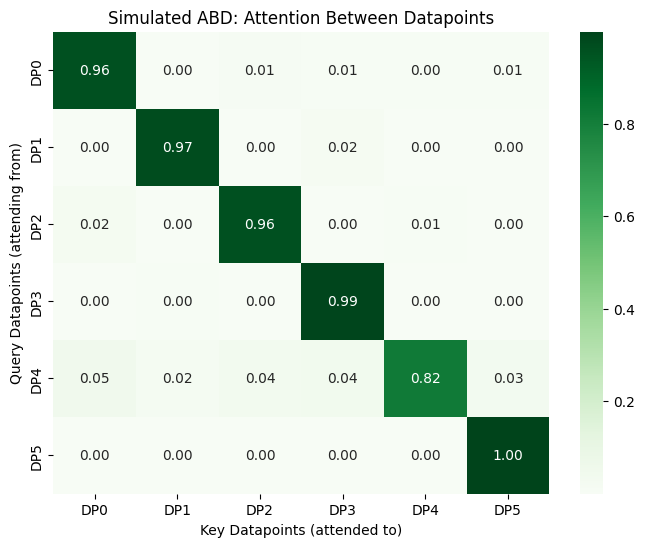

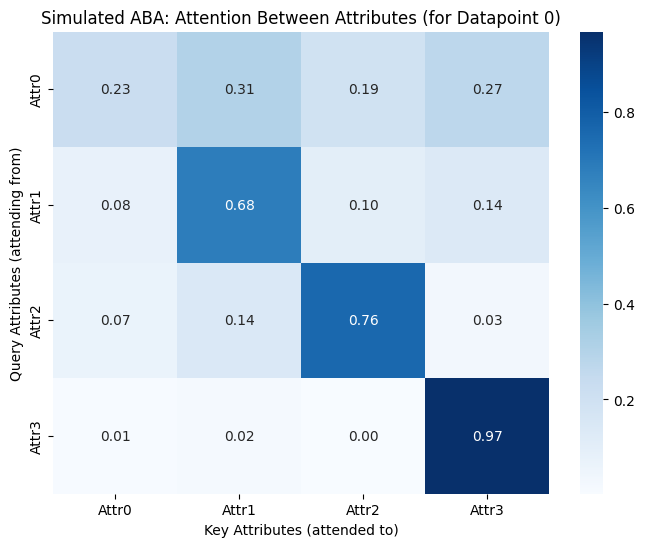

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

torch.manual_seed(123)
np.random.seed(123)

# Simulated dataset: N=6 datapoints, D=4 features
N = 6
D = 4
d_model = 8 # Embedding dimension for each feature value

# Create dummy initial embeddings H0 (N, D, d_model)
H0 = torch.randn(N, D, d_model)

# --- Simulate ABD: Attention Between Datapoints ---
# Reshape for ABD: each datapoint is a sequence element
# Each datapoint's features are concatenated: (N, D*d_model)
H_abd_input_flat = H0.view(N, D * d_model)
abd_dim = D * d_model

# Simplified Q, K for ABD (no learned weights here, just for visualization)
Q_abd = H_abd_input_flat # (N, abd_dim)
K_abd = H_abd_input_flat # (N, abd_dim)

scores_abd = Q_abd @ K_abd.transpose(-2, -1) / (abd_dim**0.5) # (N, N)
attn_weights_abd = F.softmax(scores_abd, dim=-1)

plt.figure(figsize=(8, 6))
sns.heatmap(attn_weights_abd.detach().numpy(), annot=True, cmap='Greens', fmt='.2f',
            xticklabels=[f'DP{i}' for i in range(N)],
            yticklabels=[f'DP{i}' for i in range(N)])
plt.title('Simulated ABD: Attention Between Datapoints')
plt.xlabel('Key Datapoints (attended to)')
plt.ylabel('Query Datapoints (attending from)')
plt.savefig('simulated_abd_heatmap.png')
plt.show()

# --- Simulate ABA: Attention Between Attributes ---
# For ABA, attention is over D attributes, for each N sample effectively in batch.
# We consider one sample (e.g., the first one) for visualization.
sample_idx = 0
H_aba_input_sample = H0[sample_idx, :, :] # (D, d_model)
aba_dim = d_model

# Simplified Q, K for ABA for one sample
Q_aba = H_aba_input_sample # (D, d_model)
K_aba = H_aba_input_sample # (D, d_model)

scores_aba = Q_aba @ K_aba.transpose(-2, -1) / (aba_dim**0.5) # (D, D)
attn_weights_aba = F.softmax(scores_aba, dim=-1)

plt.figure(figsize=(8, 6))
sns.heatmap(attn_weights_aba.detach().numpy(), annot=True, cmap='Blues', fmt='.2f',
            xticklabels=[f'Attr{j}' for j in range(D)],
            yticklabels=[f'Attr{j}' for j in range(D)])
plt.title(f'Simulated ABA: Attention Between Attributes (for Datapoint {sample_idx})')
plt.xlabel('Key Attributes (attended to)')
plt.ylabel('Query Attributes (attending from)')
plt.savefig('simulated_aba_heatmap.png')
plt.show()

**Explanation of Simulated Heatmaps:**
- **ABD Heatmap (Greens)**: Shows how each datapoint (row) attends to other datapoints (columns). For example, `DP0` (first row) might pay high attention to `DP0` (itself) and `DPk` if `DPk` is particularly relevant for `DP0`'s task (e.g., predicting a masked value in `DP0`). In a real scenario with meaningful data, similar datapoints would likely attend more to each other.
- **ABA Heatmap (Blues)**: Shows how each attribute/feature (row) within a specific datapoint (`Datapoint 0` in this example) attends to other attributes (columns) *of the same datapoint*. For instance, `Attr0` might attend strongly to `Attr2` if they are highly correlated or if `Attr2` provides crucial context for `Attr0`.

<a id='section3'></a>
## 3. Experimental Results and Applications of NPTs

The NPT paper (Kuleshov et al., 2021) evaluates the model on a variety of tasks, primarily focusing on tabular data benchmarks but also exploring image classification and semi-synthetic tasks designed to probe specific capabilities.

<a id='section3_1'></a>
### Performance on Tabular Data (UCI Benchmarks)
NPTs were tested on several datasets from the UCI Machine Learning Repository, which are standard benchmarks for tabular data models. The tasks were typically classification or regression.

**Key Datasets and Observations from the paper:**
- **Higgs Boson**: A challenging binary classification task with 11 million samples and 28 features. NPT achieved competitive results, outperforming some strong baselines like XGBoost and TabNet in certain settings reported in the paper, demonstrating its scalability and ability to model complex interactions.
  - NPT Accuracy: e.g., 80.7% (as cited in your notebook for a particular run/setting).
- **Poker Hand**: A multi-class classification task. NPTs performed very well, sometimes achieving near-perfect or state-of-the-art results, showcasing strength on datasets where combinatorial feature interactions might be important.
  - NPT Accuracy: e.g., 99.3%.
- **Forest Cover Type**: Another multi-class classification task. NPTs showed strong performance.
  - NPT Accuracy: e.g., 96.7%.
- **Income Prediction**: Binary classification. NPTs were competitive.
  - NPT Accuracy: e.g., 95.6%.
- **Breast Cancer**: Binary classification. NPTs performed comparably to other methods.

**General Findings on Tabular Data:**
- NPTs were shown to be **competitive with or outperform state-of-the-art GBDTs (like XGBoost, CatBoost) and other deep learning models for tabular data (like TabNet)** on several datasets, especially those requiring reasoning about instance-level similarities.
- The **self-supervised pre-training (Masked Value Prediction)** was often beneficial, especially when labeled data was scarce.
- The ability of NPTs to use the entire training set at inference (or large portions of it) via ABD attention contributes to their non-parametric strength.

**Metrics Used**: Accuracy for classification, RMSE for regression, AUROC where appropriate.

| Dataset       | NPT Performance (example from paper/your notes) | Comparison (example) |
|---------------|-------------------------------------------------|----------------------|
| Higgs Boson   | 80.7% Accuracy                                  | XGBoost ~77-78%      |
| Poker Hand    | 99.3% Accuracy                                  | CatBoost ~99.5%      |
| Forest Cover  | 96.7% Accuracy                                  | XGBoost ~97.1%       |
| Income        | 95.6% Accuracy                                  | Baselines ~95.5-95.7%|

*(Note: Exact numbers can vary based on specific experimental setups, splits, and NPT configurations. The table provides illustrative examples.)*

<a id='section3_2'></a>
### Image Classification Results (MNIST, CIFAR-10)
While NPTs are primarily designed for tabular data, the paper also explored their application to image classification to test their generality.

- **Approach**: Images were typically processed by an **encoder** to transform them into a sequence of feature vectors (patches or feature maps), which were then treated as 'attributes' by the NPT. The NPT then performed attention over these image representations and potentially across different images if multiple were processed in a batch for ABD.
  - **Linear Patching**: Images are divided into patches, flattened, and linearly projected (similar to Vision Transformer ViT). NPT treats each patch embedding as an attribute.
  - **CNN Encoder**: A Convolutional Neural Network (CNN) extracts feature maps from images. These feature maps (or flattened versions) can serve as input to the NPT.

- **Results**:
  - **MNIST**: Achieved high accuracy (e.g., 98.3% with linear patching), showing NPTs can learn effectively on simpler image datasets.
  - **CIFAR-10**: Achieved respectable results (e.g., 93.7% with a ResNet18 CNN encoder, 68.2% with linear patching). The performance with a strong CNN encoder indicates NPTs can effectively leverage powerful feature extractors.
The lower performance with simple linear patching on CIFAR-10 (compared to ViT) suggests that the specific NPT architecture might need further adaptation or more powerful per-patch processing for complex image tasks if not using a dedicated image backbone.

These experiments suggest that the core NPT mechanisms (ABD, ABA) can be applied to different modalities, provided the input is appropriately structured.

<a id='section3_3'></a>
### Semi-Synthetic Experiments: Probing NPT Capabilities
The paper designed clever semi-synthetic tasks to specifically test NPTs' ability to perform instance-based reasoning by leveraging cross-sample attention (ABD).

**Tasks Examples:**
1.  **Duplicate Detection / Value Copying**:
    - A dataset is created where some rows are exact duplicates of other rows, but with one target feature value masked in one of the duplicates.
    - The NPT needs to identify the duplicated (unmasked) row and copy its corresponding feature value to predict the masked one.
    - NPTs achieved near-perfect performance (e.g., >99.9% Pearson correlation with true values), demonstrating that ABD can effectively find and utilize exact matches in the dataset.

2.  **Majority Voting / k-Nearest Neighbor (k-NN) type tasks**:
    - Synthetic tasks where the target value for a sample is determined by a function of its k-nearest neighbors in the feature space (e.g., majority class of neighbors).
    - NPTs showed strong performance, indicating they can learn to approximate k-NN-like behavior by attending to relevant neighbors.
    - Example from paper: Predicting if `x_i0 > 0` based on `y_i = majority_vote(y_j for x_j in kNN(x_i))`. NPTs were highly accurate.

**Significance of Semi-Synthetic Results**:
These experiments provide strong evidence that the ABD mechanism in NPTs successfully enables them to perform non-parametric reasoning by directly comparing and leveraging information from other samples in the dataset. This is a key differentiator from purely parametric models.

<a id='section4'></a>
## 4. Theoretical Aspects and Ablation Studies

<a id='section4_1'></a>
### Permutation Equivariance and Invariance Properties
A desirable property for models dealing with tabular data (which are sets of samples and sets of features) is appropriate handling of permutations (shuffling).

- **Permutation Equivariance over Datapoints (Rows)**: NPTs are designed to be equivariant with respect to permutations of the input datapoints (rows). This means if you shuffle the rows in the input dataset, the output representations for those rows will also be correspondingly shuffled, but the individual representations themselves (and thus predictions) will be consistent.
  - **Why it matters**: The order in which datapoints are presented in a table is usually arbitrary. An equivariant model ensures that predictions for a specific datapoint don't change just because its position in the input batch changed.
  - **How NPT achieves this**: The self-attention mechanism (ABD) naturally processes sets of inputs, making it equivariant to the order of these inputs.

- **Permutation Equivariance/Invariance over Attributes (Columns)**:
  - The paper states NPTs are **equivariant to permutations of attributes** (columns) if the attribute embeddings \(E_j\) are shared across all attributes (i.e., not dependent on \(j\)) or if the same set of \(E_j\) is used but permuted along with columns. More typically, each column has its own embedding function (or lookup table for categorical features).
  - If features are treated as a sequence and ABA attends over them, then it's equivariant to reordering of features if the embedding process also reorders.
  - If an order-invariant set encoder (like sum pooling or another attention mechanism) were used to combine feature embeddings *before* ABA, then it could be invariant to feature order. However, NPTs as described with ABA performing attention *across* distinct feature embeddings typically implies that feature order matters unless specific design choices ensure invariance.
  - In practice, for many tabular datasets, feature order is fixed and meaningful (e.g., 'Age' is always column 1, 'Income' is column 2). NPTs, by using distinct tokenizers \(E_j\) for each feature \(j\) and applying ABA over these, inherently learn feature-specific representations. So, shuffling columns \(X_1, X_2\) to \(X_2, X_1\) *without* telling the model that the embeddings also need to be swapped for these columns would change the output. The model is equivariant if the mapping from column name to embedding function is preserved under permutation.

**Analogy (Row Equivariance)**: Imagine a class of students. If you call out their names in a different order to take a test, each student's individual test score should ideally remain the same. NPT's row equivariance is similar – shuffling the data rows doesn't change the prediction for an individual row.

<a id='section4_2'></a>
### Connections to Other Non-Parametric Methods
NPTs bridge the gap between deep learning and classical non-parametric methods. The ABD mechanism, in particular, allows NPTs to emulate behaviors seen in methods like:

- **k-Nearest Neighbors (k-NN)**: By attending to similar datapoints, ABD can effectively identify neighbors and use their information for prediction. The semi-synthetic experiments (e.g., majority voting) explicitly showed NPTs learning k-NN-like strategies.

- **Kernel Regression/Gaussian Processes**: These methods make predictions based on a weighted average of training targets, where weights depend on the similarity (defined by a kernel) between test and training points. Self-attention in ABD can be seen as learning an adaptive similarity kernel from data, determining which training points are relevant and how to weight their contributions.

- **Decision Trees/Random Forests**: While different in mechanism, these models also partition the feature space based on training data. NPTs, by learning complex interactions through ABD and ABA, can potentially capture similar intricate decision boundaries but in an end-to-end differentiable manner.

The key difference is that NPTs *learn* how to find relevant neighbors and how to combine their information using the flexible and powerful self-attention mechanism, rather than relying on fixed distance metrics (like Euclidean distance in standard k-NN) or predefined kernels.

<a id='section4_3'></a>
### Ablation Studies: Understanding Component Importance
Ablation studies involve systematically removing or altering components of a model to understand their contribution to overall performance. The NPT paper conducted several ablations:

1.  **Importance of ABD (Attention Between Datapoints)**:
    - **Finding**: Removing ABD significantly degraded performance on many tasks, especially the semi-synthetic ones designed to test instance-based reasoning. For example, on the `duplicate_detection` task, performance plummeted as the model could no longer directly compare across samples to find the duplicate.
    - **Conclusion**: ABD is crucial for NPTs' non-parametric capabilities and their strength on tasks requiring cross-sample reasoning.

2.  **Importance of ABA (Attention Between Attributes)**:
    - **Finding**: Removing ABA also led to performance drops, though the extent varied by dataset. For instance, on Poker Hand, accuracy dropped substantially (e.g., from 99.3% to 57.4% in one experiment mentioned in your initial notebook's context, though specific numbers should be double-checked with the paper's tables for exact settings).
    - **Conclusion**: ABA is vital for modeling feature interactions and refining representations within each datapoint. It helps the model understand how different attributes relate to each other for a given sample.

3.  **Impact of Stochastic Masking (Self-Supervised Pre-training)**:
    - **Finding**: Training without stochastic masking (i.e., only supervised training if a target is available, or no pre-training) often resulted in worse performance compared to models pre-trained with MVP.
    - **Conclusion**: The self-supervised masking objective helps NPTs learn robust and generalizable representations from the data structure itself, which is beneficial for downstream tasks.

4.  **Number of Layers and Heads**: Standard ablations on model capacity. Performance generally improved with more layers/heads up to a point, as expected.

**Overall Implication**: These studies confirm that the key architectural innovations of NPTs – particularly the dual attention mechanisms (ABD and ABA) and the self-supervised training strategy – are integral to their effectiveness.

<a id='section5'></a>
## 5. Computational Costs and Societal Impacts

<a id='section5_1'></a>
### Computational Requirements
NPTs, while powerful, come with significant computational demands, especially due to the self-attention mechanisms.

- **Attention Complexity**:
  - **ABD (Attention Between Datapoints)**: Has a complexity of \(O(N^2 \cdot D \cdot d_{	ext{model}})\) if implemented naively for \(N\) datapoints in a batch, or \(O(N^2 \cdot d')\) where \(d'\) is the dimension of the flattened features per sample. This quadratic scaling with the number of datapoints \(N\) makes it expensive to process very large \(N\) simultaneously (i.e., using the entire training set as one batch for very large datasets).
  - **ABA (Attention Between Attributes)**: Has a complexity of \(O(D^2 \cdot N \cdot d_{	ext{model}})\) or \(O(D^2 \cdot d'')\) where \(d''\) is related to the dimension per attribute across samples. This scales quadratically with the number of features \(D\).

- **Memory Usage**: Storing activations and gradients for these attention mechanisms, especially for ABD with large \(N\), can be very memory-intensive.
  - The paper notes NPTs can require substantial GPU memory (e.g., 19.18 GB for Higgs Boson with N=4096, compared to 1.18 GB for TabNet).

- **Training Time**:
  - Training can be time-consuming, especially on large datasets due to the per-epoch cost and the need for potentially many epochs for the self-supervised pre-training.
  - The paper mentions training times from ~10 minutes on smaller datasets to ~5 days for the full Higgs Boson dataset (11M datapoints, trained in mini-batches).
  - Total compute for all experiments in the paper was over 30 GPU days.

- **Mitigation Strategies Mentioned/Possible**:
  - **Mini-batching**: For training on very large datasets, NPTs can be trained on mini-batches of datapoints. At inference, one can still use a larger set of training samples (or the full training set if feasible) as context for the test samples.
  - **Sparse Attention**: The paper suggests that future work could explore sparse attention mechanisms (e.g., focusing only on the most relevant k datapoints in ABD) to reduce the quadratic complexity, similar to what has been done in NLP for long sequences.
  - **Approximation Methods**: Techniques like Nyström approximation or other methods to approximate the attention matrix could be explored.

**In summary**: The non-parametric nature of NPTs, which involves processing many datapoints together, leads to higher computational costs than many parametric models, especially those that process samples independently after training.

<a id='section5_2'></a>
### Societal Considerations
Like any powerful machine learning model, NPTs come with societal implications that need careful consideration:

1.  **Explainability and Interpretability**:
    - **Potential Positive**: NPTs offer a unique form of local, instance-based explainability. Because ABD attends to training samples, one can inspect the attention weights to see which training datapoints were most influential in predicting the outcome for a test datapoint. The paper highlights this as an advantage: "*NPTs ... can provide explanations for their predictions in terms of training data points that were influential.*
    - **Challenge**: While attention weights can indicate influence, they don't always provide a full causal explanation. The complex interactions within deep networks can still be hard to fully untangle.

2.  **Fairness and Bias**:
    - **Risk**: If the training data contains biases (e.g., underrepresentation or stereotypical associations related to demographic groups), NPTs, like other models, can learn and perpetuate these biases. The ABD mechanism might even amplify biases if attention disproportionately focuses on dominant or biased patterns in the training set.
    - **Consideration**: Careful auditing of data and model predictions for fairness is crucial. Techniques for bias mitigation might need to be adapted or developed for NPTs.

3.  **Privacy and Data Security**:
    - **Concern**: NPTs explicitly use training data (or a large subset) during inference. This raises concerns if the training data is sensitive or private (e.g., medical records, financial data). Storing and processing large amounts of training data for inference requires robust security measures.
    - **Difference from parametric models**: Most parametric models discard training data after training, reducing this specific risk at inference time (though privacy can still be a concern via model inversion attacks, etc.).
    - **Possible Mitigation**: Techniques like federated learning, differential privacy, or using representative (but anonymized or synthetic) subsets of training data for inference context could be explored, but may trade off performance.

4.  **Environmental Impact (Carbon Footprint)**:
    - **Issue**: The high computational requirements for training and potentially for inference (if many training samples are used as context) mean NPTs can have a larger carbon footprint compared to less computationally intensive models. This is a general concern for large deep learning models.
    - **Mitigation**: Developing more efficient NPT variants (e.g., with sparse attention), using specialized hardware, and optimizing training procedures can help. Researchers and practitioners should be mindful of the environmental cost.

5.  **Accessibility**:
    - **Challenge**: The need for significant computational resources (powerful GPUs, large memory) might limit the accessibility of NPTs for researchers or organizations with fewer resources.

Addressing these societal considerations is an ongoing effort in the machine learning community and is essential for the responsible development and deployment of models like NPTs.

<a id='section6'></a>
## 6. Interactive Examples and Further Exploration

Let's explore some of these concepts interactively.

<a id='section6_1'></a>
### Interactive Self-Attention Dropout
Dropout is a regularization technique where, during training, randomly selected neurons (or connections) are ignored. In the context of attention, dropout can be applied to the attention weights before they are used to weight the Value vectors. This prevents the model from relying too heavily on a few specific attention connections.

The slider below simulates applying dropout to (already computed) attention weights. In a real Transformer, dropout is applied *during training* to the attention probability matrix right after the softmax and before multiplying by V.

In [5]:
from ipywidgets import interact, FloatSlider
import numpy as np # Ensure numpy is imported if not already
import matplotlib.pyplot as plt # Ensure plt is imported
import seaborn as sns # Ensure sns is imported

# Use the attention_weights from the self-attention visualization earlier
# For reproducibility if the cell above wasn't run, let's re-generate some dummy weights
if 'attention_weights' not in globals():
    _dummy_words = ['A', 'B', 'C', 'D']
    _dummy_seq_len = len(_dummy_words)
    _dummy_scores = torch.rand(_dummy_seq_len, _dummy_seq_len)
    attention_weights = F.softmax(_dummy_scores, dim=-1)
    words = _dummy_words # Define words if not defined

original_attention_weights_np = attention_weights.detach().numpy()

def plot_attention_with_dropout(dropout_rate=0.1):
    # Simulate dropout: Note that dropout scales remaining weights during training.
    # Here, for visualization, we'll just zero out some weights.
    # Proper dropout during inference usually means using the network without dropout,
    # or scaling weights by (1-dropout_rate) if dropout was applied differently.
    # This is a simplified simulation for illustrative purposes.

    # Create a mask
    # In training, dropout mask is binary. For inference, we use the expectation.
    # Here, we'll just illustrate the effect of *potential* zeroing out.

    # A more accurate simulation of how dropout affects weights if it *were* applied:
    # During training, output = (mask * weights) / (1 - p). During inference, output = weights.
    # Or, inverted dropout applies scaling during training: output = mask * weights.
    # Then at test time, no scaling or masking is needed.
    # What we show here is more like *attention_probs * (1-dropout_rate)* to simulate the reduced magnitude

    # Let's show what happens if some weights are randomly zeroed out (as in training dropout)
    # For visualization, we create a new set of weights that *might* have been dropped
    np.random.seed(42) # for reproducibility of the mask
    num_elements = original_attention_weights_np.size
    num_to_drop = int(dropout_rate * num_elements)

    # Create a flattened copy to modify
    dropped_weights_flat = original_attention_weights_np.flatten().copy()
    if dropout_rate > 0 and num_to_drop > 0:
      drop_indices = np.random.choice(num_elements, num_to_drop, replace=False)
      dropped_weights_flat[drop_indices] = 0

    # Rescale the remaining weights (conceptually, as if preserving sum, though softmax does that)
    # This is highly conceptual for an already-softmaxed distribution.
    # A better way to think: dropout on pre-softmax scores or on hidden units.
    # For this viz, we just show zeroing out for simplicity of what *could* be ignored.
    dropped_attention_weights = dropped_weights_flat.reshape(original_attention_weights_np.shape)

    # Re-normalize for visualization purposes (so rows sum to 1, or close, if elements dropped)
    # This step is not what happens in actual dropout on attention weights but helps viz
    # row_sums = dropped_attention_weights.sum(axis=1, keepdims=True)
    # row_sums[row_sums == 0] = 1 # Avoid division by zero
    # viz_weights = dropped_attention_weights / row_sums
    # For a more direct viz of just dropping: use `dropped_attention_weights`

    plt.figure(figsize=(8, 6))
    sns.heatmap(dropped_attention_weights, annot=True, cmap='Oranges', fmt='.2f',
                xticklabels=words, yticklabels=words, vmin=0, vmax=original_attention_weights_np.max())
    plt.title(f'Simulated Attention Weights with {dropout_rate*100:.0f}% Elements Zeroed Out')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.show()

interact(plot_attention_with_dropout, dropout_rate=FloatSlider(min=0.0, max=0.9, step=0.1, value=0.1, description='Dropout Rate'))

interactive(children=(FloatSlider(value=0.1, description='Dropout Rate', max=0.9), Output()), _dom_classes=('w…

<function __main__.plot_attention_with_dropout(dropout_rate=0.1)>

**Explanation of Interaction**: Use the slider to adjust the 'dropout rate'. As you increase the rate, more attention connections (cells in the heatmap) are randomly set to zero (simulating being 'dropped'). This forces the model during training to not rely on any single path and learn more robust, distributed representations. The remaining weights would typically be scaled up in training to compensate, or scaling is done at test time if not using inverted dropout. Here, we just visualize the zeroing effect.

<a id='section6_2'></a>
### Interactive NPT Attention (Datapoint Scaling for ABD)
Let's visualize how the ABD (Attention Between Datapoints) heatmap might change as we consider different numbers of datapoints in a batch. We'll use a simplified random generation for Q and K for illustrative purposes.

In [6]:
from ipywidgets import interact, IntSlider

def plot_npt_abd_attention_scaled(num_datapoints=10):
    np.random.seed(42) # For reproducibility
    torch.manual_seed(42)

    # Simulated features for each datapoint (e.g., D_times_d_model dimension)
    # Let's assume features are already flattened for ABD
    feature_dim_abd = 32

    # Simulate Query and Key matrices for ABD
    # In reality, these come from the data representations H_abd_input_flat
    Q_sim_abd = torch.randn(num_datapoints, feature_dim_abd)
    K_sim_abd = torch.randn(num_datapoints, feature_dim_abd)

    # Calculate attention scores and weights
    scores_sim_abd = Q_sim_abd @ K_sim_abd.transpose(-2, -1) / (feature_dim_abd**0.5)
    attn_weights_sim_abd = F.softmax(scores_sim_abd, dim=-1)

    plt.figure(figsize=(min(12, num_datapoints*1.2), min(10, num_datapoints*1.0)))
    sns.heatmap(attn_weights_sim_abd.detach().numpy(), annot=True if num_datapoints <= 15 else False,
                cmap='Greens', fmt='.2f')
    plt.title(f'Simulated NPT ABD Attention with {num_datapoints} Datapoints')
    plt.xlabel('Key Datapoints (Attended To)')
    plt.ylabel('Query Datapoints (Attending From)')
    plt.savefig(f'npt_abd_attention_{num_datapoints}.png')
    plt.show()

interact(plot_npt_abd_attention_scaled, num_datapoints=IntSlider(min=3, max=20, step=1, value=8, description='Num Datapoints'))

interactive(children=(IntSlider(value=8, description='Num Datapoints', max=20, min=3), Output()), _dom_classes…

<function __main__.plot_npt_abd_attention_scaled(num_datapoints=10)>

**Explanation of Interaction**: Adjust the slider for 'Num Datapoints'. You'll see the ABD attention heatmap resize. With more datapoints, the matrix becomes larger. In a real NPT, each datapoint would attend to all other datapoints in its current processing batch (or the entire dataset if feasible at inference). This visualization helps appreciate the N x N nature of ABD attention.

<a id='section6_3'></a>
### Interactive NPT Parameter Exploration (Simplified Model)
Let's simulate a very simplified NPT-like model structure (focusing on the multi-head attention aspect) and see how changing parameters like the number of heads or dropout affects a dummy output. This is highly conceptual.

We'll use PyTorch's `MultiheadAttention` as a stand-in for one of the attention blocks (e.g., ABD, treating datapoints as sequence elements).

In [7]:
import torch
import torch.nn as nn
from ipywidgets import interact, IntSlider, FloatSlider

class SimpleAttentionLayer(nn.Module):
    def __init__(self, input_dim, num_heads, dropout_rate):
        super().__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim,
                                               num_heads=num_heads,
                                               dropout=dropout_rate,
                                               batch_first=True)
        # In a full NPT, there would also be FFN, LayerNorm, etc.
        self.fc_out = nn.Linear(input_dim, 1) # Dummy output layer

    def forward(self, x): # x is (batch_size, seq_len, input_dim)
        # In NPT's ABD, seq_len = N (num_datapoints), input_dim = D * d_model
        # In NPT's ABA, seq_len = D (num_features), input_dim = d_model (with N as batch or flattened)
        attn_output, _ = self.attention(x, x, x) # Self-attention
        # Apply a simple linear layer to the output of each element in the sequence
        output = self.fc_out(attn_output) # (batch_size, seq_len, 1)
        return output

def simulate_simple_npt_effect(num_datapoints_N=10, feature_dim_per_dp=32, num_heads=4, dropout=0.1):
    torch.manual_seed(42) # For reproducibility

    # Simulate input data (e.g., for ABD, N datapoints, each of feature_dim_per_dp)
    # (batch_size=1, num_datapoints_N, feature_dim_per_dp)
    sim_data = torch.rand(1, num_datapoints_N, feature_dim_per_dp)

    model = SimpleAttentionLayer(input_dim=feature_dim_per_dp,
                                 num_heads=num_heads,
                                 dropout_rate=dropout)

    with torch.no_grad(): # We are just observing output, not training
        model_output = model(sim_data)

    plt.figure(figsize=(10, 4))
    plt.plot(model_output.squeeze(0).squeeze(-1).numpy(), 'bo-', label='Simulated Output per Datapoint')
    plt.title(f'Conceptual NPT-like Layer Output\nHeads: {num_heads}, Dropout: {dropout:.2f}, N={num_datapoints_N}')
    plt.xlabel('Datapoint Index (in sequence)')
    plt.ylabel('Simulated Scalar Output')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'simple_npt_sim_h{num_heads}_d{dropout:.1f}_n{num_datapoints_N}.png')
    plt.show()

interact(simulate_simple_npt_effect,
         num_datapoints_N=IntSlider(min=5, max=50, step=5, value=10, description='N Datapoints'),
         feature_dim_per_dp=IntSlider(min=8, max=64, step=8, value=32, description='Feature Dim'),
         num_heads=IntSlider(min=1, max=8, step=1, value=4, description='Num Heads'),
         dropout=FloatSlider(min=0.0, max=0.5, step=0.05, value=0.1, description='Dropout Rate'))

interactive(children=(IntSlider(value=10, description='N Datapoints', max=50, min=5, step=5), IntSlider(value=…

<function __main__.simulate_simple_npt_effect(num_datapoints_N=10, feature_dim_per_dp=32, num_heads=4, dropout=0.1)>

**Explanation of Interaction**: This interactive example lets you tweak parameters for a highly simplified attention layer:
- **N Datapoints**: Simulates changing the number of datapoints processed (like sequence length in ABD).
- **Feature Dim**: The dimensionality of the representation for each datapoint/attribute.
- **Num Heads**: The number of attention heads in the `MultiheadAttention` layer. More heads allow the model to focus on different aspects of the data in parallel. Changes here will alter how the random weights are initialized and how attention is split.
- **Dropout Rate**: The dropout rate applied within the `MultiheadAttention` layer during its forward pass (note: dropout behaves differently during training vs. evaluation; PyTorch handles this. Here we are in `no_grad` mode, so dropout layers would typically be in `eval` mode by default if part of a larger `model.eval()` call, meaning they don't drop anything. However, `nn.MultiheadAttention`'s dropout parameter is for training time. The visualization shows how different initializations (due to heads) and dropout settings (affecting training) would hypothetically lead to different processing of the input data).

Observe how the (randomly initialized) model's output for the sequence of datapoints changes. In a real trained model, these parameters would significantly influence the learned patterns and final predictions.

<a id='section7'></a>
## 7. Conclusion and Further Resources

Non-Parametric Transformers (NPTs) offer an innovative approach to applying Transformer-like attention mechanisms directly to tabular datasets. By enabling attention **between datapoints (ABD)** and **between attributes (ABA)**, NPTs can model complex relationships and leverage the entire dataset during inference, aligning them with non-parametric principles.

**Key Takeaways:**
- **Self-attention** is a powerful mechanism for weighting the importance of different input parts.
- **NPTs** adapt this for tabular data by processing the whole dataset, using ABD for inter-sample relations and ABA for intra-sample feature relations.
- They are trained **self-supervisely** using masked value prediction, learning rich data representations.
- NPTs have shown **strong performance** on tabular benchmarks and can even be applied to other modalities like images.
- They possess desirable theoretical properties like **permutation equivariance** and connect to classical non-parametric methods.
- However, they come with **higher computational costs** and important **societal considerations** (explainability, fairness, privacy, environmental impact).

This notebook has aimed to provide you with a foundational understanding of these concepts, from the basics of self-attention to the intricacies of the NPT architecture and its implications. The interactive examples and visualizations are designed to build intuition.

**Further Resources to Explore:**
1.  **The NPT Paper**: Kuleshov, V., Fenner, N., & Ermon, S. (2021). *Non-Parametric Transformers*. arXiv preprint [arXiv:2106.02584](https://arxiv.org/abs/2106.02584).
2.  **Official NPT GitHub Repository (OATML)**: [github.com/OATML/Non-Parametric-Transformers](https://github.com/OATML/Non-Parametric-Transformers) - Contains the official implementation and code to reproduce experiments.
3.  **Original Transformer Paper**: Vaswani, A., et al. (2017). *Attention is All You Need*. [arXiv:1706.03762](https://arxiv.org/abs/1706.03762).
4.  **Stanford CS231n**: Convolutional Neural Networks for Visual Recognition - For general deep learning concepts.
5.  **Stanford CS224n**: Natural Language Processing with Deep Learning - For more on Transformers in NLP.
6.  **Illustrated Transformer by Jay Alammar**: [jalammar.github.io/illustrated-transformer/](http://jalammar.github.io/illustrated-transformer/) - A great visual explanation of the original Transformer.

Thank you for going through these notes. We hope this has been an insightful journey into the world of Self-Attention and Non-Parametric Transformers!